# Exploratory Data Analysis
## Sample Problem: Detecting Electrical Plugs in Amazon Marketplace Products
#### In this notebook, we will explore an Amazon dataset. In some marketplaces, ASINs having electrical plugs need to be accompanied by a compliance form. Thus it is desirable to identify ASINs which have an electrical plug.

__Dataset schema:__ 
- __ASIN__: Product ASIN
- __target_label:__ Binary field with values in {0,1}. A value of 1 show ASIN has a plug, otherwise 0.
- __ASIN_STATIC_ITEM_NAME:__ Title of the ASIN.
- __ASIN_STATIC_PRODUCT_DESCRIPTION:__ Description of the ASIN
- __ASIN_STATIC_GL_PRODUCT_GROUP_TYPE:__ GL information for the ASIN.
- __ASIN_STATIC_ITEM_PACKAGE_WEIGHT:__ Weight of the ASIN.
- __ASIN_STATIC_LIST_PRICE:__ Price information for the ASIN.
- __ASIN_STATIC_BATTERIES_INCLUDED:__ Information whether batteries are included along with the product.
- __ASIN_STATIC_BATTERIES_REQUIRED:__ Information whether batteries are required for using the product.
- __ASIN_STATIC_ITEM_CLASSIFICATION:__ Item classification of whether it is a standalone or bundle parent item etc

## 1. Reading the data
Let's read the dataset into a dataframe.

In [2]:
import pandas as pd

# import the datasets
df = pd.read_csv('C:\\Users\\solharsh\\Downloads\\Tabular Data MLU\\final_project\\final_project\\asin_product.csv',encoding= 'unicode_escape')

C:\Users\solharsh\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,18,19,23,31,38,41,48,63,78,82,85,96,105) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 2. Overall Statistics:
We will look at number of rows, columns and simple statistics of the dataset.

In [19]:
# Print the first five rows
# NaN means missing data
df.head(10)

,ASIN,target_label,ASIN_STATIC_ITEM_NAME,ASIN_STATIC_PRODUCT_DESCRIPTION,ASIN_STATIC_GL_PRODUCT_GROUP_TYPE,ASIN_STATIC_ITEM_PACKAGE_WEIGHT,ASIN_STATIC_LIST_PRICE,ASIN_STATIC_BATTERIES_INCLUDED,ASIN_STATIC_BATTERIES_REQUIRED,ASIN_STATIC_ITEM_CLASSIFICATION
0,B004U9MOWO,0,Master Lock 8 X 900 mm Chain Integrated 4 Digi...,Master Lock Street Flexium 900mm Integrated Co...,gl_sports,2.650000,16.66,False,False,base_product
1,B006OJWZMW,0,In Phase SRX-EQ 10 Band Parametric Equalizer w...,NaN,gl_wireless,1.680000,158.33,False,False,base_product
2,B00008VIJ4,0,Technics RPDJ1210 DJ Headphones - Silver,"Plated Connector:Gold, Connector Type:Headphon...",gl_home_entertainment,1.455036,NaN,False,False,base_product
3,B005433T4M,0,"Heartwarmers Coming Home Padded Lap Tray, 42 x...",NaN,gl_home,1.763680,12.49,False,NaN,base_product
4,B0073CN63Q,0,"Douceur D'Intérieur - 1600728, Curtain With E...",NaN,gl_home,2.292784,25.42,False,False,base_product
5,B00F5223QM,0,Legler Lamborghini Aventador LP700 Plastic Model,A car for stars and super rich ones! In matt b...,gl_toy,5.070580,NaN,False,True,base_product
6,B00MGT8FAA,0,MARTY Food for Cannaries,NaN,gl_pet_products,2.292784,NaN,False,NaN,base_product
7,B003ESVCGG,0,Apiro 150006 Twin Square Car Exhaust Tip,"Exhaust Back Box, Stainless Steel, Universal S...",gl_automotive,9.347505,NaN,NaN,NaN,base_product
8,B00187PYTQ,0,Bresser spotting scope Pirsch 20-60x80,<b>Bresser are proud to introduce their latest...,gl_camera,5.950000,NaN,False,True,base_product
9,B00074U7VQ,0,Small Foot Company 1710 Garden Tool Bag,Garden Bag - dark<br/>,gl_toy,1.719588,NaN,False,False,base_product


In [20]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61233 entries, 0 to 61232
Data columns (total 10 columns):
ASIN                                 61233 non-null object
target_label                         61233 non-null int64
ASIN_STATIC_ITEM_NAME                61233 non-null object
ASIN_STATIC_PRODUCT_DESCRIPTION      35261 non-null object
ASIN_STATIC_GL_PRODUCT_GROUP_TYPE    61233 non-null object
ASIN_STATIC_ITEM_PACKAGE_WEIGHT      61141 non-null float64
ASIN_STATIC_LIST_PRICE               45741 non-null float64
ASIN_STATIC_BATTERIES_INCLUDED       50058 non-null object
ASIN_STATIC_BATTERIES_REQUIRED       45229 non-null object
ASIN_STATIC_ITEM_CLASSIFICATION      61221 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 4.7+ MB


In [21]:
# This will print basic statistics for numerical columns
df.describe()

,target_label,ASIN_STATIC_ITEM_PACKAGE_WEIGHT,ASIN_STATIC_LIST_PRICE
count,61233.000000,61141.000000,4.574100e+04
mean,0.036647,31.520023,1.475785e+02
std,0.187895,462.639041,1.664631e+04
min,0.000000,0.000000,1.160000e+00
25%,0.000000,1.520000,1.667000e+01
50%,0.000000,2.513244,3.291000e+01
75%,0.000000,5.555592,7.000000e+01
max,1.000000,29500.000000,3.560000e+06


## 3. Basic Plots

In this section, we will plot our data. Important note: These plots ignore null (missing) values. 


__Bar plots:__ These plots show counts of categorical data fields. value_counts() function yields the counts of each unique value. It is useful for categorical variables.

In [22]:
df['target_label'].value_counts()

0    58989
1     2244
Name: target_label, dtype: int64

__plot.bar()__ addition to the __value_counts()__ function makes a bar plot of the values.

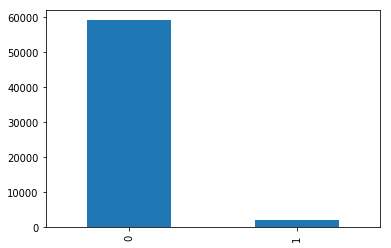

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

df['target_label'].value_counts().plot.bar()
plt.show()

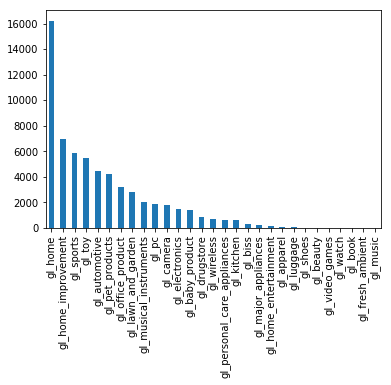

In [24]:
import matplotlib.pyplot as plt

df['ASIN_STATIC_GL_PRODUCT_GROUP_TYPE'].value_counts().plot.bar()
plt.show()

In [25]:
df['ASIN_STATIC_GL_PRODUCT_GROUP_TYPE'].value_counts()

gl_home                        16221
gl_home_improvement             6985
gl_sports                       5868
gl_toy                          5493
gl_automotive                   4435
gl_pet_products                 4231
gl_office_product               3229
gl_lawn_and_garden              2779
gl_musical_instruments          2008
gl_pc                           1837
gl_camera                       1790
gl_electronics                  1440
gl_baby_product                 1375
gl_drugstore                     857
gl_wireless                      655
gl_personal_care_appliances      643
gl_kitchen                       626
gl_biss                          259
gl_major_appliances              237
gl_home_entertainment            116
gl_apparel                        58
gl_luggage                        34
gl_shoes                          22
gl_beauty                         20
gl_video_games                     7
gl_watch                           3
gl_book                            3
g

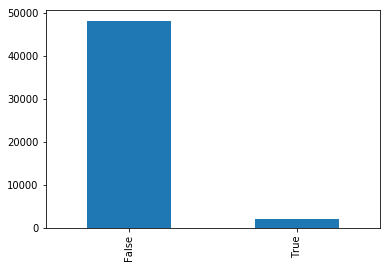

In [26]:
df['ASIN_STATIC_BATTERIES_INCLUDED'].value_counts().plot.bar()
plt.show()

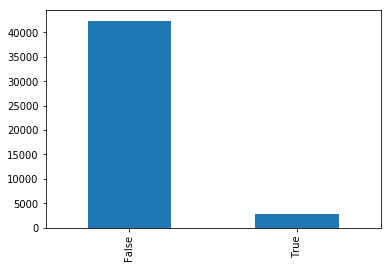

In [27]:
df['ASIN_STATIC_BATTERIES_REQUIRED'].value_counts().plot.bar()
plt.show()

__Histograms:__ Histograms show distribution of numeric data. Data is divided into "buckets" or "bins".

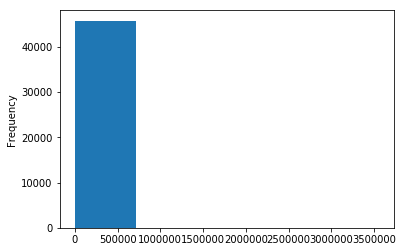

In [28]:
df['ASIN_STATIC_LIST_PRICE'].plot.hist(bins=5)
plt.show()

When we look at the histogram above, we can see that values are heavily placed in the first bin. Let's check the min-max values below.

In [29]:
df['ASIN_STATIC_LIST_PRICE'].min()

1.16

In [30]:
df['ASIN_STATIC_LIST_PRICE'].max()

3560000.0

__value_counts()__ function again becomes useful here. Let's increase the number of bins to 10 for more bins. Looking below, we can see that we have an outlier number in the last bin. We have a very expensive item of worth more than __3 million $__ :) 

This is likely a wrong value. We will drop this record.

In [31]:
df['ASIN_STATIC_LIST_PRICE'].value_counts(bins=10, sort=False)

(-3558.84, 356001.044]        45740
(356001.044, 712000.928]          0
(712000.928, 1068000.812]         0
(1068000.812, 1424000.696]        0
(1424000.696, 1780000.58]         0
(1780000.58, 2136000.464]         0
(2136000.464, 2492000.348]        0
(2492000.348, 2848000.232]        0
(2848000.232, 3204000.116]        0
(3204000.116, 3560000.0]          1
Name: ASIN_STATIC_LIST_PRICE, dtype: int64

In [32]:
dropIndexes = df[df['ASIN_STATIC_LIST_PRICE'] > 3000000].index
df.drop(dropIndexes , inplace=True)

In [33]:
df['ASIN_STATIC_LIST_PRICE'].value_counts(bins=10, sort=False)

(-13.838999999999999, 1500.944]    45704
(1500.944, 3000.728]                  15
(3000.728, 4500.512]                   9
(4500.512, 6000.296]                   3
(6000.296, 7500.08]                    2
(7500.08, 8999.864]                    4
(8999.864, 10499.648]                  0
(10499.648, 11999.432]                 1
(11999.432, 13499.216]                 0
(13499.216, 14999.0]                   2
Name: ASIN_STATIC_LIST_PRICE, dtype: int64

Let' see the histogram again.

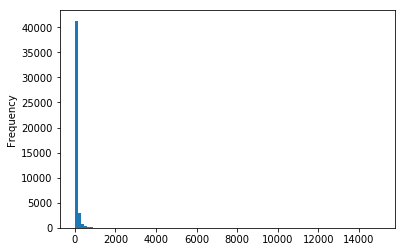

In [34]:
df['ASIN_STATIC_LIST_PRICE'].plot.hist(bins=100)
plt.show()

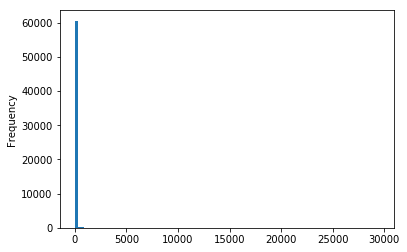

In [35]:
df['ASIN_STATIC_ITEM_PACKAGE_WEIGHT'].plot.hist(bins=100)
plt.show()

In [36]:
df['ASIN_STATIC_ITEM_PACKAGE_WEIGHT'].value_counts(bins=5, sort=False)

(-29.501, 5900.0]     61064
(5900.0, 11800.0]        51
(11800.0, 17700.0]       20
(17700.0, 23600.0]        1
(23600.0, 29500.0]        4
Name: ASIN_STATIC_ITEM_PACKAGE_WEIGHT, dtype: int64

## 4. Handling Missing Values
#### Check the number of missing (nan) values for each column

In [37]:
df.isna().sum()

ASIN                                     0
target_label                             0
ASIN_STATIC_ITEM_NAME                    0
ASIN_STATIC_PRODUCT_DESCRIPTION      25972
ASIN_STATIC_GL_PRODUCT_GROUP_TYPE        0
ASIN_STATIC_ITEM_PACKAGE_WEIGHT         92
ASIN_STATIC_LIST_PRICE               15492
ASIN_STATIC_BATTERIES_INCLUDED       11175
ASIN_STATIC_BATTERIES_REQUIRED       16004
ASIN_STATIC_ITEM_CLASSIFICATION         12
dtype: int64

### 4.1 Impute (fill-in) Missing Values:

__1-Imputing Numerical Values:__ The easiest way to impute numerical values is to get the __average (mean) value__ for the corresponding column and use that as the new value for each missing record in that column. 

In [38]:
# Assign our df to a new df (You can use the same df in your final project)
df_imputed = df

# Let's impute our two numerical columns. 
# "inplace=True" parameter replaces missing values in place (no need for left handside assignment)

df_imputed["ASIN_STATIC_ITEM_PACKAGE_WEIGHT"].fillna(df_imputed["ASIN_STATIC_ITEM_PACKAGE_WEIGHT"].mean(), inplace=True)
df_imputed["ASIN_STATIC_LIST_PRICE"].fillna(df_imputed["ASIN_STATIC_LIST_PRICE"].mean(), inplace=True)

__2-Imputing Categorical Values:__ We can impute categorical values by getting the most common (mode) value for the corresponding column and use that as the new value for each missing record in that column. We can also create a new category such as "Missing" for those columns.

In [39]:
# Let's find the mode for our two categorical columns.
print(df_imputed["ASIN_STATIC_BATTERIES_INCLUDED"].mode())
print(df_imputed["ASIN_STATIC_BATTERIES_REQUIRED"].mode())

0    False
dtype: object
0    False
dtype: object


In [40]:
# Let's impute our two categorical columns. 
# "inplace=True" parameter replaces missing values in place (no need for left handside assignment)

df_imputed["ASIN_STATIC_BATTERIES_INCLUDED"].fillna(False, inplace=True)
df_imputed["ASIN_STATIC_BATTERIES_REQUIRED"].fillna(False, inplace=True)

In [41]:
# Creating a new category named "Missing". 
# This won't change anything if you run the mode imputation first. Pick one of the method for each column.

df_imputed["ASIN_STATIC_BATTERIES_INCLUDED"].fillna("Missing", inplace=True)
df_imputed["ASIN_STATIC_BATTERIES_REQUIRED"].fillna("Missing", inplace=True)
df_imputed["ASIN_STATIC_PRODUCT_DESCRIPTION"].fillna("Missing", inplace=True)
df_imputed["ASIN_STATIC_ITEM_CLASSIFICATION"].fillna("Missing", inplace=True)

Let's check the missing values below

In [42]:
df_imputed.isna().sum()

ASIN                                 0
target_label                         0
ASIN_STATIC_ITEM_NAME                0
ASIN_STATIC_PRODUCT_DESCRIPTION      0
ASIN_STATIC_GL_PRODUCT_GROUP_TYPE    0
ASIN_STATIC_ITEM_PACKAGE_WEIGHT      0
ASIN_STATIC_LIST_PRICE               0
ASIN_STATIC_BATTERIES_INCLUDED       0
ASIN_STATIC_BATTERIES_REQUIRED       0
ASIN_STATIC_ITEM_CLASSIFICATION      0
dtype: int64

### 4.2. Drop rows with missing values
We will simply drop rows that have at least one missing value.

In [43]:
df_missing_dropped = df.dropna()

Let's check the missing values below

In [44]:
df_missing_dropped.isna().sum()

ASIN                                 0
target_label                         0
ASIN_STATIC_ITEM_NAME                0
ASIN_STATIC_PRODUCT_DESCRIPTION      0
ASIN_STATIC_GL_PRODUCT_GROUP_TYPE    0
ASIN_STATIC_ITEM_PACKAGE_WEIGHT      0
ASIN_STATIC_LIST_PRICE               0
ASIN_STATIC_BATTERIES_INCLUDED       0
ASIN_STATIC_BATTERIES_REQUIRED       0
ASIN_STATIC_ITEM_CLASSIFICATION      0
dtype: int64

### 4.3. Drop columns with missing values:

We can drop some columns if we think there is siginificant amount of missing data in those columns.

__Hint:__ You can again use inplace=True parameter to drop columns inplace without assignment.

In [45]:
df_columns_dropped = df.drop(columns = ["ASIN_STATIC_ITEM_PACKAGE_WEIGHT", 
                                        "ASIN_STATIC_LIST_PRICE",
                                        "ASIN_STATIC_BATTERIES_INCLUDED",
                                        "ASIN_STATIC_BATTERIES_REQUIRED"
                                       ])
df_columns_dropped.head()

,ASIN,target_label,ASIN_STATIC_ITEM_NAME,ASIN_STATIC_PRODUCT_DESCRIPTION,ASIN_STATIC_GL_PRODUCT_GROUP_TYPE,ASIN_STATIC_ITEM_CLASSIFICATION
0,B004U9MOWO,0,Master Lock 8 X 900 mm Chain Integrated 4 Digi...,Master Lock Street Flexium 900mm Integrated Co...,gl_sports,base_product
1,B006OJWZMW,0,In Phase SRX-EQ 10 Band Parametric Equalizer w...,Missing,gl_wireless,base_product
2,B00008VIJ4,0,Technics RPDJ1210 DJ Headphones - Silver,"Plated Connector:Gold, Connector Type:Headphon...",gl_home_entertainment,base_product
3,B005433T4M,0,"Heartwarmers Coming Home Padded Lap Tray, 42 x...",Missing,gl_home,base_product
4,B0073CN63Q,0,"Douceur D'Intérieur - 1600728, Curtain With E...",Missing,gl_home,base_product


## 5. Scatter Plots, Pair Plots and Correlation
__5.1 Scatter plot:__ Simple 2D plots of numerical variables. We can see relationship between 2 variables. Below, we are plotting package weight vs list price. 

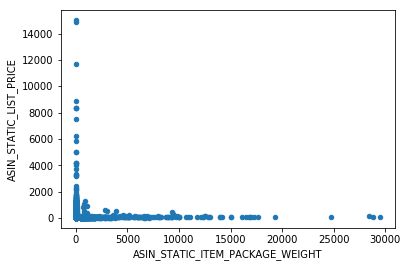

In [46]:
import matplotlib.pyplot as plt

df.plot.scatter(x='ASIN_STATIC_ITEM_PACKAGE_WEIGHT', y='ASIN_STATIC_LIST_PRICE')
plt.show()

From this scatter plot, we can see that these two variables do not have a relationship. 

### Scatterplot with Identification

We can also add the target value: "Plug" or "No plug" to our scatter plot.

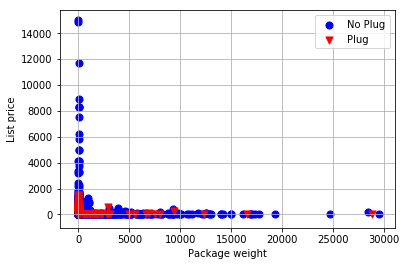

In [47]:
import seaborn as sns

X1 = df[['ASIN_STATIC_ITEM_PACKAGE_WEIGHT', 'ASIN_STATIC_LIST_PRICE']][df['target_label'] == 0]
X2 = df[['ASIN_STATIC_ITEM_PACKAGE_WEIGHT', 'ASIN_STATIC_LIST_PRICE']][df['target_label'] == 1]

plt.scatter(X1.iloc[:,0], 
            X1.iloc[:,1], 
            s=50, 
            c='blue', 
            marker='o', 
            label='No Plug')

plt.scatter(X2.iloc[:,0], 
            X2.iloc[:,1], 
            s=50, 
            c='red', 
            marker='v', 
            label='Plug')

plt.xlabel('Package weight')
plt.ylabel('List price')
plt.legend()
plt.grid()
plt.show()

From this plot, we can't get a good separation between the data points.

## Correlation Matrix Heatmap:
We will plot the correlation matrix. Correlation is calculated for numerical fields. For that reason, we will only pick the numerical fields: __ASIN_STATIC_ITEM_PACKAGE_WEIGHT__ and __ASIN_STATIC_LIST_PRICE__

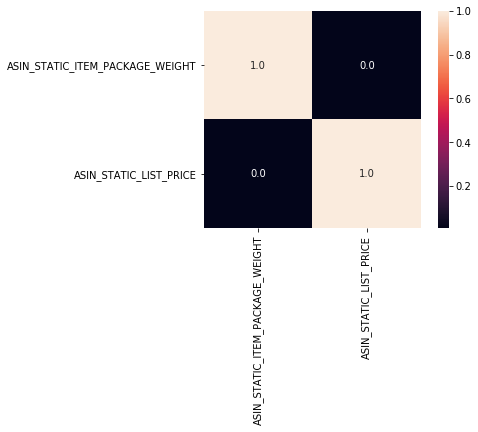

In [48]:
import numpy as np

cols = ['ASIN_STATIC_ITEM_PACKAGE_WEIGHT', 'ASIN_STATIC_LIST_PRICE']
cm = np.corrcoef(df[cols].values.T)
ax = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.1f', yticklabels=cols, xticklabels=cols)
plt.show()

From the correlation matrix, we can see that there is no relationship between listing price and item package weight.

### A fancy example using Seaborn
Simulating a dataset with some correlation we can show a fancy example below for 26 dimensions.

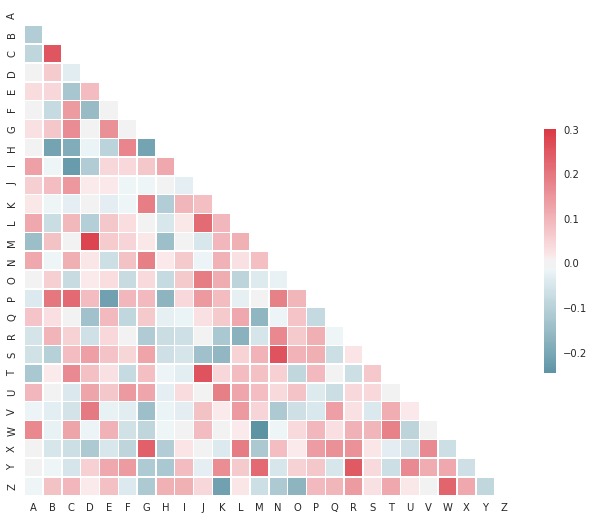

In [49]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# K Nearest Neighbors Model

## Fitting K Nearest Neighbors Classifier to our Electrical Plug Dataset

__Dataset schema:__ 
- __ASIN__: Product ASIN
- __target_label:__ Binary field with values in {0,1}. A value of 1 show ASIN has a plug, otherwise 0.
- __ASIN_STATIC_ITEM_NAME:__ Title of the ASIN.
- __ASIN_STATIC_PRODUCT_DESCRIPTION:__ Description of the ASIN
- __ASIN_STATIC_GL_PRODUCT_GROUP_TYPE:__ GL information for the ASIN.
- __ASIN_STATIC_ITEM_PACKAGE_WEIGHT:__ Weight of the ASIN.
- __ASIN_STATIC_LIST_PRICE:__ Price information for the ASIN.
- __ASIN_STATIC_BATTERIES_INCLUDED:__ Information whether batteries are included along with the product.
- __ASIN_STATIC_BATTERIES_REQUIRED:__ Information whether batteries are required for using the product.
- __ASIN_STATIC_ITEM_CLASSIFICATION:__ Item classification of whether it is a standalone or bundle parent item etc

## 2. Overall Statistics and Imputing:
We will look at number of rows, columns and simple statistics of the dataset.

In [2]:
df["ASIN_STATIC_ITEM_CLASSIFICATION"].unique()

array(['base_product', nan, 'variation_parent'], dtype=object)

In [3]:
# Print the first five rows
# NaN means missing data
df.head()

,ASIN,target_label,ASIN_STATIC_ITEM_NAME,ASIN_STATIC_PRODUCT_DESCRIPTION,ASIN_STATIC_GL_PRODUCT_GROUP_TYPE,ASIN_STATIC_ITEM_PACKAGE_WEIGHT,ASIN_STATIC_LIST_PRICE,ASIN_STATIC_BATTERIES_INCLUDED,ASIN_STATIC_BATTERIES_REQUIRED,ASIN_STATIC_ITEM_CLASSIFICATION
0,B004U9MOWO,0,Master Lock 8 X 900 mm Chain Integrated 4 Digi...,Master Lock Street Flexium 900mm Integrated Co...,gl_sports,2.650000,16.66,False,False,base_product
1,B006OJWZMW,0,In Phase SRX-EQ 10 Band Parametric Equalizer w...,NaN,gl_wireless,1.680000,158.33,False,False,base_product
2,B00008VIJ4,0,Technics RPDJ1210 DJ Headphones - Silver,"Plated Connector:Gold, Connector Type:Headphon...",gl_home_entertainment,1.455036,NaN,False,False,base_product
3,B005433T4M,0,"Heartwarmers Coming Home Padded Lap Tray, 42 x...",NaN,gl_home,1.763680,12.49,False,NaN,base_product
4,B0073CN63Q,0,"Douceur D'Intérieur - 1600728, Curtain With E...",NaN,gl_home,2.292784,25.42,False,False,base_product


In [4]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61233 entries, 0 to 61232
Data columns (total 10 columns):
ASIN                                 61233 non-null object
target_label                         61233 non-null int64
ASIN_STATIC_ITEM_NAME                61233 non-null object
ASIN_STATIC_PRODUCT_DESCRIPTION      35261 non-null object
ASIN_STATIC_GL_PRODUCT_GROUP_TYPE    61233 non-null object
ASIN_STATIC_ITEM_PACKAGE_WEIGHT      61141 non-null float64
ASIN_STATIC_LIST_PRICE               45741 non-null float64
ASIN_STATIC_BATTERIES_INCLUDED       50058 non-null object
ASIN_STATIC_BATTERIES_REQUIRED       45229 non-null object
ASIN_STATIC_ITEM_CLASSIFICATION      61221 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 4.7+ MB


In [5]:
# This will print basic statistics for numerical columns
#df.describe()
df.head()

,ASIN,target_label,ASIN_STATIC_ITEM_NAME,ASIN_STATIC_PRODUCT_DESCRIPTION,ASIN_STATIC_GL_PRODUCT_GROUP_TYPE,ASIN_STATIC_ITEM_PACKAGE_WEIGHT,ASIN_STATIC_LIST_PRICE,ASIN_STATIC_BATTERIES_INCLUDED,ASIN_STATIC_BATTERIES_REQUIRED,ASIN_STATIC_ITEM_CLASSIFICATION
0,B004U9MOWO,0,Master Lock 8 X 900 mm Chain Integrated 4 Digi...,Master Lock Street Flexium 900mm Integrated Co...,gl_sports,2.650000,16.66,False,False,base_product
1,B006OJWZMW,0,In Phase SRX-EQ 10 Band Parametric Equalizer w...,NaN,gl_wireless,1.680000,158.33,False,False,base_product
2,B00008VIJ4,0,Technics RPDJ1210 DJ Headphones - Silver,"Plated Connector:Gold, Connector Type:Headphon...",gl_home_entertainment,1.455036,NaN,False,False,base_product
3,B005433T4M,0,"Heartwarmers Coming Home Padded Lap Tray, 42 x...",NaN,gl_home,1.763680,12.49,False,NaN,base_product
4,B0073CN63Q,0,"Douceur D'Intérieur - 1600728, Curtain With E...",NaN,gl_home,2.292784,25.42,False,False,base_product


Let's check our target distribution.

In [6]:
import matplotlib.pyplot as plt

df['target_label'].value_counts().plot.bar()
plt.show()

<Figure size 640x480 with 1 Axes>

We can see from the target plot above that we are dealing with an imbalanced dataset. This means one result type is dominating the other one(s). In this case, we have a lot of "no plug" records but not many "plug" records.

In [7]:
df['ASIN_STATIC_LIST_PRICE'].value_counts(bins=10, sort=False)

(-3558.84, 356001.044]        45740
(356001.044, 712000.928]          0
(712000.928, 1068000.812]         0
(1068000.812, 1424000.696]        0
(1424000.696, 1780000.58]         0
(1780000.58, 2136000.464]         0
(2136000.464, 2492000.348]        0
(2492000.348, 2848000.232]        0
(2848000.232, 3204000.116]        0
(3204000.116, 3560000.0]          1
Name: ASIN_STATIC_LIST_PRICE, dtype: int64

We have an outlier data in the last bin. We will remove this data point below.

In [8]:
dropIndexes = df[df['ASIN_STATIC_LIST_PRICE'] > 3000000].index
df.drop(dropIndexes , inplace=True)

In [9]:
df['ASIN_STATIC_LIST_PRICE'].value_counts(bins=10, sort=False)

(-13.838999999999999, 1500.944]    45704
(1500.944, 3000.728]                  15
(3000.728, 4500.512]                   9
(4500.512, 6000.296]                   3
(6000.296, 7500.08]                    2
(7500.08, 8999.864]                    4
(8999.864, 10499.648]                  0
(10499.648, 11999.432]                 1
(11999.432, 13499.216]                 0
(13499.216, 14999.0]                   2
Name: ASIN_STATIC_LIST_PRICE, dtype: int64

We will only consider __numerical values__ in this exercise. They are __ASIN_STATIC_ITEM_PACKAGE_WEIGHT__ and __ASIN_STATIC_LIST_PRICE__.

Let's check missing values for these columns.

In [10]:
df["ASIN_STATIC_ITEM_PACKAGE_WEIGHT"].isna().sum()

92

In [11]:
df["ASIN_STATIC_LIST_PRICE"].isna().sum()

15492

As a quick fix, we will apply mean imputation. This will replace the missing values with the mean value of the corresponding column.

In [12]:
print("Mean value of package weight:", df["ASIN_STATIC_ITEM_PACKAGE_WEIGHT"].mean())
print("Mean value of list price:", df["ASIN_STATIC_LIST_PRICE"].mean())

Mean value of package weight: 31.507184248991948
Mean value of list price: 69.750458242256


In [13]:
df["ASIN_STATIC_ITEM_PACKAGE_WEIGHT"].fillna(df["ASIN_STATIC_ITEM_PACKAGE_WEIGHT"].mean(), inplace=True)
df["ASIN_STATIC_LIST_PRICE"].fillna(df["ASIN_STATIC_LIST_PRICE"].mean(), inplace=True)

Let's check missing values one more time

In [14]:
df["ASIN_STATIC_ITEM_PACKAGE_WEIGHT"].isna().sum()

0

In [15]:
df["ASIN_STATIC_LIST_PRICE"].isna().sum()

0

## 4. Training and test subsets
We will split our dataset into training (90%) and test (10%) subsets. 

In [16]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.1, shuffle=True, random_state=23)

## 5. Fitting the classifier
We will use Sklearn's K Nearest Neighbors Classifier algorithm here.

In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Let's get the input and output data for training of the classifier
X_train = train_data[['ASIN_STATIC_ITEM_PACKAGE_WEIGHT', 'ASIN_STATIC_LIST_PRICE']].values
y_train = train_data['target_label'].values

print("Training data shape:", X_train.shape)
print("Training label shape:", y_train.shape)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

Training data shape: (55108, 2)
Training label shape: (55108,)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

## 6. Testing

Let's see how the classifier performs with "unseen" data (our test data). We will use the predict() function this time.

In [18]:
# Let's get the input and output data for testing the classifier
X_test = test_data[['ASIN_STATIC_ITEM_PACKAGE_WEIGHT', 'ASIN_STATIC_LIST_PRICE']].values
y_test = test_data['target_label'].values

y_pred = knn.predict(X_test)

In [19]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

We will use Sklearn's metrics functions to see the results.

__Confusion matrix:__ The diagonals show us correct classifications. Each row and column belongs to a class (plug or no plug). The first column and row correspond to "no plug" case, the second column-rows are "plug" case.

In [20]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[5917    3]
 [ 203    1]]


When we look at the confusion matrix, we can quickly see that we have only "1" correct classification (1 on the diagonal bottom right) for the items with plug.

Let's look at the classification report and accuracy below.from sklearn.metrics import classification_report

In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5920
           1       0.25      0.00      0.01       204

   micro avg       0.97      0.97      0.97      6124
   macro avg       0.61      0.50      0.50      6124
weighted avg       0.94      0.97      0.95      6124

Accuracy: 0.9663618549967342


We achieved 96.6% accuracy on our test dataset. <br/>
This might seem like a good score, but the confusion matrix and classification report show poor performance for items with plug (class 1). <br/>
__We have a heavily imbalanced dataset and the accuracy score is heavily dominated by the non-plug samples.__